In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("loans_full_schema.csv")

In [11]:
#What is the common purpose of all of the loan takers?

import numpy as np
import matplotlib.pyplot as plt
x_bar=df['loan_purpose']

<AxesSubplot:>

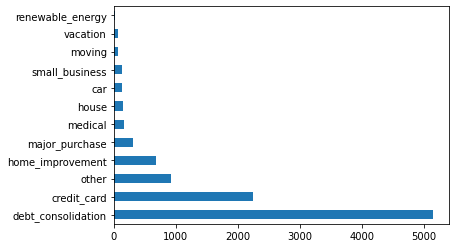

In [12]:
df['loan_purpose'].value_counts().plot(kind='barh')

In [13]:
rslt_df = df['account_never_delinq_percent'][df['homeownership']=='OWN'] 
rslt_df.describe()

count    1353.000000
mean       94.821434
std         8.854196
min        36.400000
25%        92.900000
50%       100.000000
75%       100.000000
max       100.000000
Name: account_never_delinq_percent, dtype: float64

<AxesSubplot:title={'center':'Delinque rate for homeowners who have their OWN house'}, xlabel='Delinque rate', ylabel='homewowners count'>

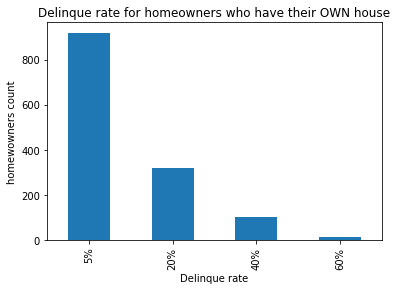

In [16]:
#how the delinqu percentage is related with homeownership

# rslt_df=pd.cut(rslt_df,bins=[40,60,80,95,100],labels=['60%','40%','20%','5%'])
#delinque rate for homeowners who have their OWN house

rslt_df.value_counts().plot(kind='bar',title="Delinque rate for homeowners who have their OWN house",xlabel="Delinque rate",ylabel='homewowners count')

<AxesSubplot:title={'center':'Bankrupts in public record'}, xlabel='state', ylabel='number of bankrupts'>

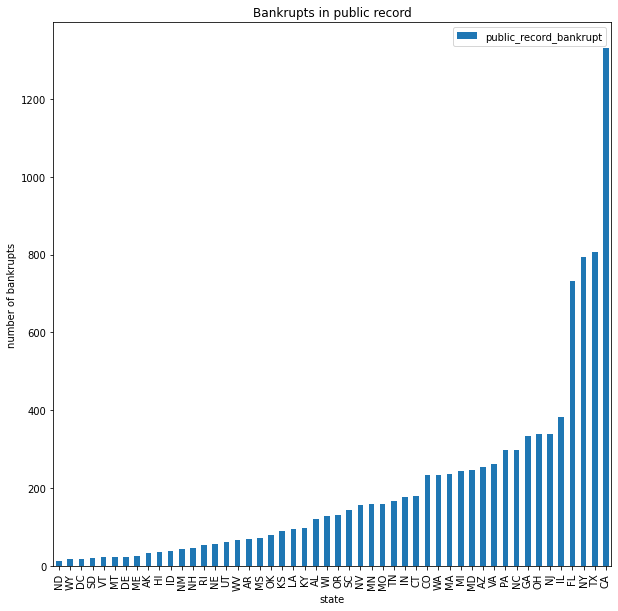

In [24]:
#which state has more public record bankrupts

x=df[['state','public_record_bankrupt']]
x.groupby(['state']).count().sort_values(by=['public_record_bankrupt']).plot(kind="bar",title="Bankrupts in public record",ylabel="number of bankrupts",xlabel="state",figsize=(10,10))


In [ ]:
#highest bankrupts were in California

In [ ]:
#how many have paid interest fees if they are late in Loan payment

In [25]:
df['loan_status'].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

In [26]:
(df['paid_late_fees']!=0.00).sum()

52

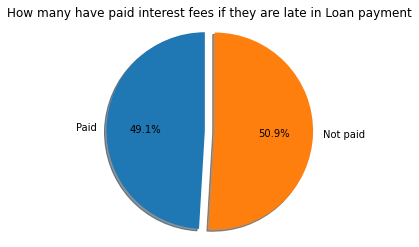

In [29]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Paid','Not paid'
sizes = [52,54]
explode = (0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("How many have paid interest fees if they are late in Loan payment")
plt.show()

C:\Users\Prashant Jadiya\anaconda3\envs\pj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_credit_limit'>

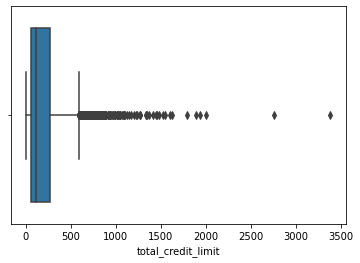

In [30]:
tcl=df['total_credit_limit']/1000

import seaborn as sns
sns.boxplot(tcl)

C:\Users\Prashant Jadiya\anaconda3\envs\pj\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_income'>

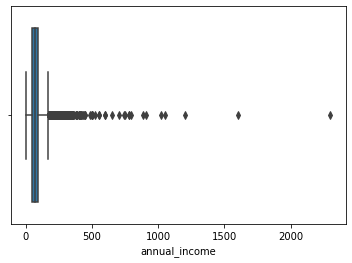

In [31]:
ain=df['annual_income']/1000

sns.boxplot(ain)

In [32]:
ratio=tcl/ain
ratio

0       0.786611
1       0.720000
2       0.604825
3       0.846667
4       1.995400
          ...   
9995    1.844398
9996    3.157529
9997    5.170179
9998    3.680938
9999    1.392227
Length: 10000, dtype: float64

In [33]:
ratio.value_counts()

inf         23
0.260000     7
0.300000     6
0.600000     5
0.200000     4
            ..
6.242648     1
3.587444     1
3.590758     1
3.802000     1
1.392227     1
Length: 9862, dtype: int64

In [34]:
type(ratio)

pandas.core.series.Series

In [35]:
rslt_df2=pd.cut(ratio,bins=[0,1,2,3,4,5,6,7,8],labels=['1x','2x','3x','4x','5x','6x','7x','8x'])

<AxesSubplot:title={'center':'Total credit limit to annual income ratio'}, xlabel='Credit limit (Multiplier of Annual income)', ylabel='Number of people'>

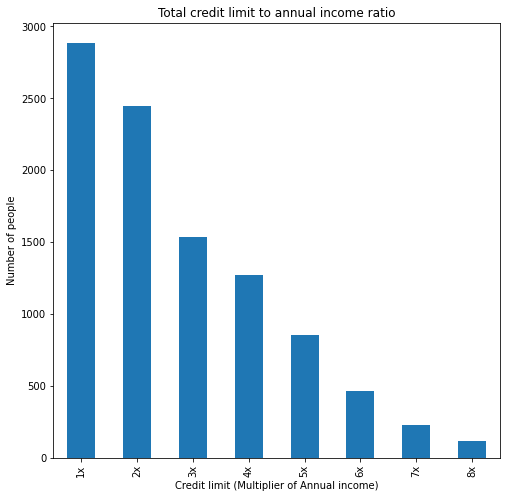

In [36]:
rslt_df2.value_counts().plot(kind="bar",title="Total credit limit to annual income ratio",xlabel="Credit limit (Multiplier of Annual income)",ylabel="Number of people",figsize=(8,8))